In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (14,6)

## Functions

In [2]:
def customer_aligner (days):
    """ takes a list of weekdays ind dataframe format and 
    creates a continoues count of customer IDs. Returns a single dataframe 
    containing all the days from the list"""
    
    count = True
    for i in days:
        i['day'] = i.index.day_name()
        if count == True:
            week = i
            count = False
        else:
            i['customer_no'] = i['customer_no'] + week['customer_no'].max()
            week = pd.concat([week, i])
    week.index = pd.to_datetime(week.index)
    return week

## Data Import

In [3]:
monday = pd.read_csv('./data/monday.csv', sep=';',index_col=0, parse_dates=True)
tuesday = pd.read_csv('./data/tuesday.csv', sep=';',index_col=0, parse_dates=True)
wednesday = pd.read_csv('./data/wednesday.csv', sep=';',index_col=0, parse_dates=True)
thursday = pd.read_csv('./data/thursday.csv', sep=';',index_col=0, parse_dates=True)
friday = pd.read_csv('./data/friday.csv', sep=';',index_col=0, parse_dates=True)

In [4]:
weekdays = [monday, tuesday, wednesday, thursday, friday]

In [5]:
monday.head(3)

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy


In [6]:
week = customer_aligner(weekdays)

In [7]:
week.shape
week.head(3)

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,Monday
2019-09-02 07:03:00,2,dairy,Monday
2019-09-02 07:04:00,3,dairy,Monday


In [8]:
#sns.heatmap(week.isna(), cbar=False)

## Calculate the total number of customers in each section

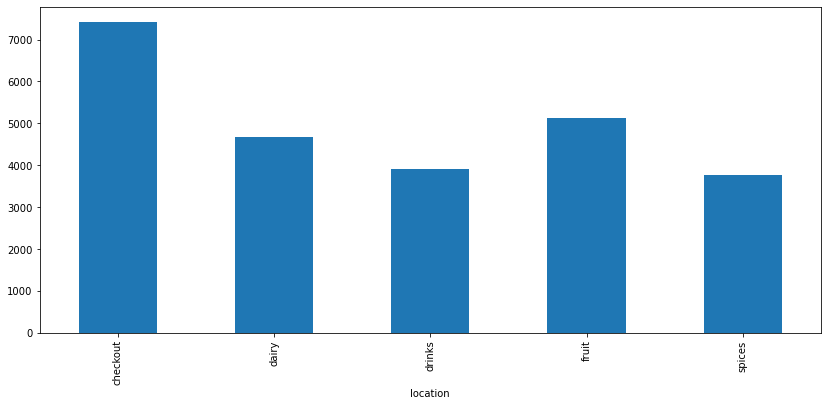

In [9]:
week.groupby('location')['customer_no'].count().plot(kind = 'bar');

## Calculate the total number of customers in each section over time

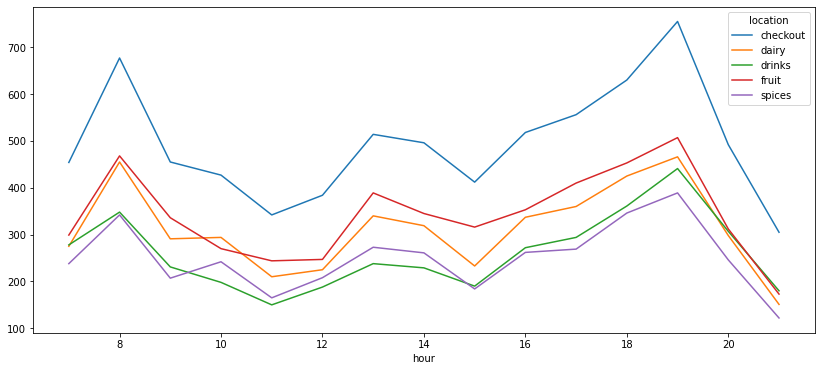

In [10]:
week['hour'] = week.index.hour
week.groupby('hour')['location'].value_counts().unstack().plot();

## Display the number of customers at checkout over time

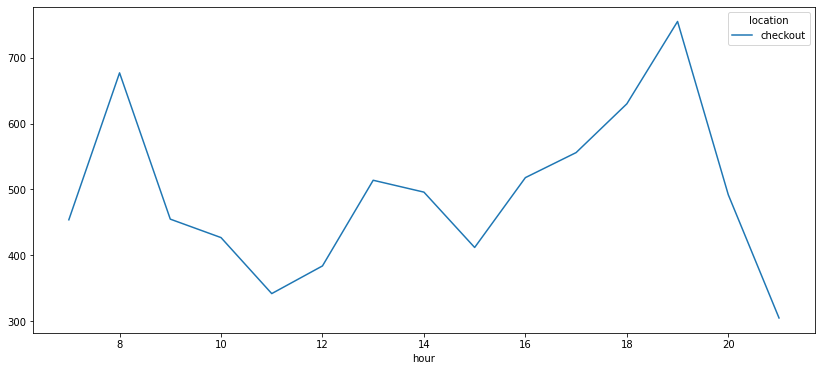

In [11]:
week_checkout = week[week['location'] == 'checkout']
week_checkout.groupby('hour')['location'].value_counts().unstack().plot();

## Calculate the time each customer spent in the market

In [12]:
week.head()

,customer_no,location,day,hour
timestamp,,,,
2019-09-02 07:03:00,1,dairy,Monday,7
2019-09-02 07:03:00,2,dairy,Monday,7
2019-09-02 07:04:00,3,dairy,Monday,7
2019-09-02 07:04:00,4,dairy,Monday,7
2019-09-02 07:04:00,5,spices,Monday,7


In [13]:
cust_grp = week.groupby(['customer_no']).resample('min').ffill()

In [14]:
cust_grp = cust_grp.drop(columns ='customer_no') #why do I ned dis???!?!

In [15]:
cust_grp = cust_grp.reset_index()

In [16]:
cust_grp

,customer_no,timestamp,location,day,hour
0,1,2019-09-02 07:03:00,dairy,Monday,7
1,1,2019-09-02 07:04:00,dairy,Monday,7
2,1,2019-09-02 07:05:00,checkout,Monday,7
3,2,2019-09-02 07:03:00,dairy,Monday,7
4,2,2019-09-02 07:04:00,dairy,Monday,7
...,...,...,...,...,...
53898,7443,2019-09-06 21:48:00,dairy,Friday,21
53899,7443,2019-09-06 21:49:00,dairy,Friday,21
53900,7443,2019-09-06 21:50:00,checkout,Friday,21
53901,7444,2019-09-06 21:50:00,drinks,Friday,21


In [17]:
cust_delta = pd.DataFrame(cust_grp.groupby('customer_no')['timestamp'].max() - cust_grp.groupby('customer_no')['timestamp'].min())

In [18]:
cust_delta

,timestamp
customer_no,
1,0 days 00:02:00
2,0 days 00:03:00
3,0 days 00:02:00
4,0 days 00:04:00
5,0 days 00:01:00
...,...
7441,0 days 00:00:00
7442,0 days 00:02:00
7443,0 days 00:02:00


In [19]:
delta = []
for i in range(1,(len(cust_delta['timestamp'])+1)):
    delta.append((cust_delta['timestamp'][i].seconds)/60)

In [20]:
cust_delta['delta_min'] = delta

In [21]:
cust_delta

,timestamp,delta_min
customer_no,,
1,0 days 00:02:00,2.0
2,0 days 00:03:00,3.0
3,0 days 00:02:00,2.0
4,0 days 00:04:00,4.0
5,0 days 00:01:00,1.0
...,...,...
7441,0 days 00:00:00,0.0
7442,0 days 00:02:00,2.0
7443,0 days 00:02:00,2.0


## Calculate the total number of customers in the supermarket over time

In [22]:
week['customer_no'].max()

7445

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [23]:
cust_grp

,customer_no,timestamp,location,day,hour
0,1,2019-09-02 07:03:00,dairy,Monday,7
1,1,2019-09-02 07:04:00,dairy,Monday,7
2,1,2019-09-02 07:05:00,checkout,Monday,7
3,2,2019-09-02 07:03:00,dairy,Monday,7
4,2,2019-09-02 07:04:00,dairy,Monday,7
...,...,...,...,...,...
53898,7443,2019-09-06 21:48:00,dairy,Friday,21
53899,7443,2019-09-06 21:49:00,dairy,Friday,21
53900,7443,2019-09-06 21:50:00,checkout,Friday,21
53901,7444,2019-09-06 21:50:00,drinks,Friday,21


In [24]:
cust_grp.groupby('customer_no')['timestamp'].min()

customer_no
1      2019-09-02 07:03:00
2      2019-09-02 07:03:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
5      2019-09-02 07:04:00
               ...        
7441   2019-09-06 21:48:00
7442   2019-09-06 21:48:00
7443   2019-09-06 21:48:00
7444   2019-09-06 21:50:00
7445   2019-09-06 21:50:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

## Calculating the Probability Matrix

In [26]:
cust_grp

,customer_no,timestamp,location,day,hour
0,1,2019-09-02 07:03:00,dairy,Monday,7
1,1,2019-09-02 07:04:00,dairy,Monday,7
2,1,2019-09-02 07:05:00,checkout,Monday,7
3,2,2019-09-02 07:03:00,dairy,Monday,7
4,2,2019-09-02 07:04:00,dairy,Monday,7
...,...,...,...,...,...
53898,7443,2019-09-06 21:48:00,dairy,Friday,21
53899,7443,2019-09-06 21:49:00,dairy,Friday,21
53900,7443,2019-09-06 21:50:00,checkout,Friday,21
53901,7444,2019-09-06 21:50:00,drinks,Friday,21


In [27]:
cust_grp['location_after'] = cust_grp['location'].shift(-1)

In [28]:
cust_grp.tail(5)

,customer_no,timestamp,location,day,hour,location_after
53898,7443,2019-09-06 21:48:00,dairy,Friday,21,dairy
53899,7443,2019-09-06 21:49:00,dairy,Friday,21,checkout
53900,7443,2019-09-06 21:50:00,checkout,Friday,21,drinks
53901,7444,2019-09-06 21:50:00,drinks,Friday,21,spices
53902,7445,2019-09-06 21:50:00,spices,Friday,21,NaN


In [29]:
for i in range(len(cust_grp)):
    if cust_grp['location'][i] == 'checkout':
        cust_grp['location_after'][i] = 'checkout'
    else:
        pass  

<ipython-input-29-7758ab4e4ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_grp['location_after'][i] = 'checkout'


In [30]:
cust_grp

,customer_no,timestamp,location,day,hour,location_after
0,1,2019-09-02 07:03:00,dairy,Monday,7,dairy
1,1,2019-09-02 07:04:00,dairy,Monday,7,checkout
2,1,2019-09-02 07:05:00,checkout,Monday,7,checkout
3,2,2019-09-02 07:03:00,dairy,Monday,7,dairy
4,2,2019-09-02 07:04:00,dairy,Monday,7,dairy
...,...,...,...,...,...,...
53898,7443,2019-09-06 21:48:00,dairy,Friday,21,dairy
53899,7443,2019-09-06 21:49:00,dairy,Friday,21,checkout
53900,7443,2019-09-06 21:50:00,checkout,Friday,21,checkout
53901,7444,2019-09-06 21:50:00,drinks,Friday,21,spices


In [31]:
probs = cust_grp.groupby('location')['location_after'].value_counts(normalize=True).unstack()

In [32]:
probs['dairy'][0] = 0
probs['drinks'][0] = 0
probs['fruit'][0] = 0
probs['spices'][0] = 0

In [33]:
probs #for the whole week

location_after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.102678,0.737088,0.058625,0.050129,0.051480
drinks,0.215505,0.010899,0.598499,0.088012,0.087086
fruit,0.201054,0.095924,0.055162,0.597183,0.050677
spices,0.149912,0.193564,0.163135,0.091126,0.402262


In [34]:
initial_state = np.array([0, 0, 1, 0, 0]) #starting at drinks

In [35]:
np.dot(initial_state,probs) #testing probs

array([0.21550483, 0.01089862, 0.59849887, 0.08801152, 0.08708616])

## Starting Location

In [109]:
orig = pd.read_csv('whole_week_w_next_prev.csv', delimiter =',', index_col='timestamp',parse_dates=True).iloc[:,1:]

In [111]:
spawn = orig[orig['prev_loc']=='entrance']['location'].value_counts(normalize=True)
spawn

fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
Name: location, dtype: float64

## Classes

## Building Classes

In [112]:
class Supermarket:
    
    def __init__(self):
        
        self.last_id = 0
        self.customers = []
        self.minutes = 0
        self.max_customers = 3
        self.former_customers = []
        
    def __repr__(self):
        return f"The customers in the supermarket are {self.customers}."
    
    def get_time(self):
        """current time in HH:MM format,
        """
        return None
    
    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        if self.minutes < 840:
            self.minutes += 1
        
        return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        while (len(self.customers) < self.max_customers):
            self.last_id += 1
            customer = Customer(f"cust_id{self.last_id}")
            self.customers.append(customer)

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """    
        for c in self.customers:
            if c.location == 'checkout':
                self.former_customers.append(c)
    

    
            

In [113]:
class Customer:
    
    def __init__(self, name):
        
        self.name = name
        self.location = np.random.choice(['dairy','fruit','drinks','spices'], p=spawn)
        self.loc_sequence = []
        self.probs = probs
        self.possible_locations = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        
        
    def __repr__(self):
        return f"Customer {self.name} is in the {self.location} section."      

        
    def change_location(self):
        self.location = np.random.choice(self.possible_locations, p=self.probs.loc[self.location])
        
        

In [126]:
cs = []
for c in edeka.customers:
#    print(c)
    customer_journey = [edeka.customers[c].location]

    while edeka.customers[c].location != 'checkout':
        edeka.customers[c].change_location()
        customer_journey.append(edeka.customers[c].location)
#        print(c)
    cs.append(customer_journey)
cs

TypeError: list indices must be integers or slices, not Customer